# "Les Misérables" de Victor Hugo - Uma Aplicação da Teoria de Grafos


# PARTE I (ANÁLISE GLOBAL):
# ANÁLISE DE CAMINHOS, CONECTIVIDADE, CENTRALIDADE, COMUNIDADE & CLUSTERING 

Nota: grafo não direcionado e com pesos

In [1]:
import networkx as nx #biblioteca para o estudo de grafos  
import sklearn as sk #biblioteca para os algoritmos de clustering
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib notebook 


## Criar grafo a partir de um ficheiro txt (via Pandas DataFrame + função nx.from_pandas_edgelist() )

In [2]:
G_df = pd.read_csv('C:/lesmiserables.txt', delim_whitespace=True, header=None, names=['source', 'target', 'weight'])
G_df.head(10) #mostrar 10 primeiras linhas do DataFrame

,source,target,weight
0,1,0,1
1,2,0,8
2,3,0,10
3,3,2,6
4,4,0,1
5,5,0,1
6,6,0,1
7,7,0,1
8,8,0,2
9,9,0,1


In [3]:
G = nx.from_pandas_edgelist(G_df, 'source', 'target', edge_attr='weight') #criação da rede

In [4]:
print(nx.info(G)) #informações básicas da rede

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


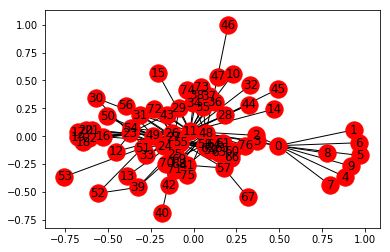

In [5]:
nx.draw_networkx(G) #representação gráfica da rede

In [6]:
print("densidade:", nx.density (G))
#A densidade é igual a 0 para grafos sem arestas e 1 para um grafo completo.

densidade: 0.08680792891319207


## Análise de Caminhos

In [7]:
#Algoritmo de Dijkstra para cálculo dos caminhos curtos e seus comprimentos entre um vértice source e os demais vértices 
#O output é um tuple de 2 dicionários cujas keys são os vértices target:
#O 1º.dicionário contém a distância entre o vértice source e o vértice target. 
#O 2º.dicionário contém o caminho curto entre o vértice source e o vértice target. 
length,path = nx.single_source_dijkstra(G, 0, target=None, cutoff=None, weight='weight')

In [8]:
#print (length, path)

In [9]:
#print(length)

In [10]:
print(length[2]) #entre os nódulos "0" e "8" há uma distância "2"

8


In [11]:
print(path[8]) #caminho mais curto entre os nódulos "0" e "8"

[0, 8]


In [12]:
max_value = max(length.values()) #o mais "longo" dos caminhos curtos (e que corresponde ao diâmetro)
print(max_value)

12


In [13]:
max_keys = [k for k, v in length.items() if v == max_value]

In [14]:
print (max_value, max_keys)

12 [20, 21, 22]


In [15]:
#Implementação de um algoritmo para cálculo do diâmetro e do raio, num grafo com pesos
#O algoritmo permite ainda aferir quais os vértices associados ao diâmetro
#nota: biblioteca networkx só permite o cálculo de diâmetros para grafos sem pesos
L = [] #cria uma lista vazia
for i in range (77):
    length,path = nx.single_source_dijkstra(G, i, target=None, cutoff=None, weight='weight')
    max_length_value = max(length.values())
    max_keys = [k for k, v in length.items() if v == max_length_value]
    if max_length_value != 0:
        L.append(max_length_value)     
    #print("vértice",i,":","comprimento do caminho curto mais longo->", max_length_value,",","nódulos target->", max_keys)
print("O DIÂMETRO DA REDE É:", max(L))
print("O RAIO DA REDE É:", min(L))
  
    

O DIÂMETRO DA REDE É: 14
O RAIO DA REDE É: 7


In [16]:
#validação dos resultados anteriores
#validação 1: node 32 - comprimento do caminho curto mais "longo"? vértices target?
val_1 = nx.dijkstra_path_length(G, 32, 8, weight='weight')
print("val_1:", val_1)
#validação 2: node 76 - comprimento do caminho curto mais "longo"? vértices target?
val_2 = nx.dijkstra_path_length(G, 76, 8, weight='weight')
print("val_2:", val_2)

val_1: 8
val_2: 9


In [17]:
def diametro(G):  
    L = [] #criação uma lista vazia
    nodes = nx.nodes(G) #criação de uma lista com todos os vértices do grafo
    for i in (nodes):
        #criação de um dicionário para o vértice i ("keys"-vértices, "values"-caminhos curtos entre i e cada vértice)
        length,path = nx.single_source_dijkstra(G, i, target=None, cutoff=None, weight='weight')
        #identificação do caminho curto mais longo
        max_length_value = max(length.values())
        #o caminho curto mais curto associado ao vértice i é guardado na lista L
        L.append(max_length_value)
    #o diâmetro do grafo corresponde ao valor máximo guardado na lista L
    return max(L)
    

In [18]:
diametro(G)

14

## Análise da Conectividade

Um grafo não direcionado está conectado se, para cada par de vértices, há um caminho entre eles.


In [19]:
nx.number_connected_components(G) 
#output=1 significa que a rede tem apenas 1 componente, logo, quaisquer pares de personagens estão ligadas por um caminho

1

Robustez - capacidade do grafo para manter a sua conectividade sob ataque (remoção de vértices ou arestas).
Grafos robustos são aqueles que têm um número mínimo de vértices/arestas a remover elevado.


In [20]:
#qual é o número mínimo de vértices a remover de modo a desconectar o grafo?
#quais são os vértices?
print("número mínimo de vértices a remover:", nx.node_connectivity(G))
print("vértices a remover:", nx.minimum_node_cut(G))

número mínimo de vértices a remover: 1
vértices a remover: {11}


## Análise da Centralidade

As métricas de centralidade usam diferentes pressupostos quanto ao significado de vértice "central". Assim, produzem diferentes rankings.

A melhor métrica de centralidade depende do contexto do grafo em análise.

Para identificação dos vértices centrais, normalmente é melhor usar várias métricas de centralidade em vez de confiar em apenas uma.


In [21]:
#grau de vértice, considerando arestas com pesos
G.degree(11,weight='weight')


158

In [22]:
#criação de um dicionário: as "keys" são os vértices, os "values" são os respetivos graus ponderados 
dict_nd = {}
total_vert = len(nx.nodes(G))
for i in range(total_vert):
    value_gp = G.degree(i,weight='weight')
    dict_nd[i] = value_gp
#print (dict_nd)  


In [23]:
#grau máximo ponderado
list_nd = list(dict_nd.values()) 
top5_nd = [] #cria lista vazia onde serão guardados os 5 valores máximos de graus ponderados
print("TOP 5 GRAUS PONDERADOS")
while len(top5_nd)<5:
    max_temp = max(list_nd)
    max_nd_key = [k for k, v in dict_nd.items() if v == max_temp]
    print("vértice:", max_nd_key, "grau ponderado:", max_temp)
    top5_nd.append(max_temp)
    list_nd.remove(max_temp) 


TOP 5 GRAUS PONDERADOS
vértice: [11] grau ponderado: 158
vértice: [55] grau ponderado: 104
vértice: [58] grau ponderado: 91
vértice: [62] grau ponderado: 84
vértice: [26, 59] grau ponderado: 68


In [24]:
#degree centrality
#(1 significa que o vértice está ligado a todos os demais vértices do grafo, 0 se não está ligado a qualquer vértice)
#pressuposto: os vértices importantes têm muitas ligações
dict_dc = nx.degree_centrality(G)
list_dc = list(dict_dc.values()) 
top5_dc = [] #cria lista vazia onde serão guardados os 5 valores de degree centrality mais elevados
print("TOP 5 DEGREE CENTRALITY")
while len(top5_dc)<5:
    max_temp = max(list_dc)
    max_dc_key = [k for k, v in dict_dc.items() if v == max_temp]
    print("vértice:", max_dc_key, "degree centrality:", max_temp)
    top5_dc.append(max_temp)
    list_dc.remove(max_temp)

TOP 5 DEGREE CENTRALITY
vértice: [11] degree centrality: 0.47368421052631576
vértice: [48] degree centrality: 0.2894736842105263
vértice: [55] degree centrality: 0.25
vértice: [27] degree centrality: 0.22368421052631576
vértice: [25] degree centrality: 0.21052631578947367


In [25]:
#validação do resultado anterior
dict_dc = nx.degree_centrality(G)
#print(dict_dc)

In [26]:
#eigenvalue centrality
dict_ec = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight='weight')
list_ec = list (dict_ec.values())
top5_ec = []
print("TOP 5 EINGENVALUE CENTRALITY")
while len(top5_ec)<5:
    max_temp = max(list_ec)
    max_ec_key = [k for k, v in dict_ec.items() if v == max_temp]
    print("vértice:", max_ec_key, "eigenvalue centrality:", max_temp)
    top5_ec.append(max_temp)
    list_ec.remove(max_temp)  

TOP 5 EINGENVALUE CENTRALITY
vértice: [11] eigenvalue centrality: 0.4556594087506563
vértice: [55] eigenvalue centrality: 0.4187103329749058
vértice: [26] eigenvalue centrality: 0.3741792779490554
vértice: [58] eigenvalue centrality: 0.3058187875500282
vértice: [62] eigenvalue centrality: 0.2823969230549174


In [27]:
#carregar dataset com os pesos invertidos
GPI_df = pd.read_csv('c:\lesmiserablespi.csv', sep=";", header=None, names=['source', 'target', 'weight'])

#criação do grafo com os pesos invertidos - "GPI" 
GPI = nx.from_pandas_edgelist(GPI_df, 'source', 'target', edge_attr='weight')

In [28]:
#closeness centrality 
#pressuposto: os vértices importantes estão próximos dos demais vértices
dict_cc = nx.closeness_centrality(GPI, u=None, distance="weight")
list_cc = list (dict_cc.values())
top5_cc = []
print("TOP 5 CLOSENESS CENTRALITY")
while len(top5_cc)<5:
    max_temp = max(list_cc)
    max_cc_key = [k for k, v in dict_cc.items() if v == max_temp]
    print("vértice:", max_cc_key, "closeness centrality:", max_temp)
    top5_cc.append(max_temp)
    list_cc.remove(max_temp)


TOP 5 CLOSENESS CENTRALITY
vértice: [11.0] closeness centrality: 1.6898389539007483
vértice: [55.0] closeness centrality: 1.6482360621038
vértice: [26.0] closeness centrality: 1.64056513151504
vértice: [27.0] closeness centrality: 1.564094965260627
vértice: [25.0] closeness centrality: 1.5314583715358316


In [37]:
#betweenness centrality
#pressuposto: os vértices importantes ligam outros vértices
#um vértice tem betweeness centrality elevada se aparece em muitos caminhos curtos dos outros vértices
dict_bc = nx.betweenness_centrality(GPI, k=None, weight='weight', endpoints=False)
list_bc = list (dict_bc.values())
top5_bc = []
print("TOP 5 BETWEENNESS CENTRALITY")
while len(top5_bc)<5:
    max_temp = max(list_bc)
    max_bc_key = [k for k, v in dict_bc.items() if v == max_temp]
    print("vértice:", max_bc_key, "betweeness centrality:", max_temp)
    top5_bc.append(max_temp)
    list_bc.remove(max_temp)



TOP 5 BETWEENNESS CENTRALITY
vértice: [11.0] betweeness centrality: 0.7946491228070175
vértice: [55.0] betweeness centrality: 0.4989473684210526
vértice: [0.0] betweeness centrality: 0.223859649122807
vértice: [23.0] betweeness centrality: 0.19333333333333333
vértice: [62.0] betweeness centrality: 0.17649122807017542


## Clustering

As duas técnicas (i.e. hierárquicas e não-hierárquicas) podem ser combinadas:
1)usar uma metodologia hierárquica (ex.mean shift clustering) para definir o número de grupos/clusters (se desconhecido) e, de seguida,
2)optimizar a partição usando um método não-hierárquico (ex.k-means).


O Silhouette Ratio é provavelmente a métrica mais apropriada para medir a qualidade do k-means.

In [34]:
#import dataset into numpy array
G_a = np.loadtxt('C:/lesmiserables_height_weight.txt')
#print(G_a)

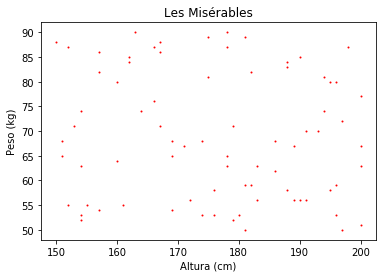

In [35]:
x = G_a[:,0]
y = G_a[:,1]
plt.plot(x, y, "ro", markersize = 1)
plt.title("Les Misérables")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.show()


### 1º passo) Clustering Hierárquico (via Mean Shift Clustering) 

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MeanShift 

Centros dos clusters: [[184.64864865  60.62162162]
 [165.13793103  71.55172414]]
Número estimado de clusters: 2


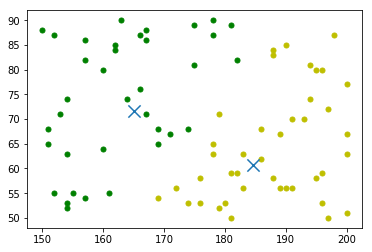

In [34]:
ms = MeanShift()
ms.fit(G_a)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print('Centros dos clusters:',cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Número estimado de clusters:", n_clusters_)

colors = 10*['y.','g.','b.','c.','k,','r.','m.'] #como não sabemos quantos clusters o algoritmo irá retornar, disponibilizamos um mínimo de 70 cores

#print('Cores:',colors)
#print('Etiquetas:',labels)

for i in range (len(G_a)):
    plt.plot(G_a[i][0], G_a[i][1], colors[labels[i]], markersize=10)

x_cluster_centers = cluster_centers[:,0]
y_cluster_centers = cluster_centers[:,1]
plt.scatter(x_cluster_centers, y_cluster_centers, marker = "x", s = 150, linewidths = 5, zorder = 10)

plt.show()

### 2º passo) Clustering Não-Hierárquico (via K-means)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

from sklearn.cluster import KMeans



Centróides: [[188.07317073  64.87804878]
 [162.63888889  73.63888889]]


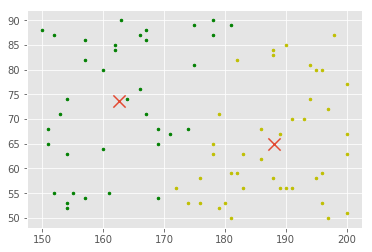

In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(G_a)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centróides:",centroids)
#print("Etiquetas:",labels)

colors = ['y.','g.','b.']

for i in range (len(G_a)):
    #print("Coordenadas:",G_a[i], "Etiqueta:", labels[i])
    plt.plot(G_a[i][0], G_a[i][1], colors[labels[i]], markersize=5)
    
x_centroids = centroids[:,0]
y_centroids = centroids[:,1]
plt.scatter(x_centroids, y_centroids, marker = "x", s = 150, linewidths = 5, zorder = 10)

plt.show()

### O Coeficiente Silhouette 

-O seu valor varia entre -1 para um incorreto clustering e +1 para um clustering de elevada densidade. Valores em torno de zero indicam overlapping clusters (i.e. clusters sobrepostos).
-A pontuação é elevada quando os clusters são densos e estão bem separados entre eles.


In [37]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2).fit(G_a)
labels = kmeans_model.labels_
metrics.silhouette_score(G_a, labels, metric='euclidean')

0.40421637833617735